<a href="https://colab.research.google.com/github/Pravallika-02-datascience/Customer-Churn-Prediction-in-SaaS-Using-Machine-learning-and-Feature-importance-analysis/blob/main/Customer_Churn_Prediction_in_SaaS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction in SaaS Using Machine learning and Feature importance analysis

In the highly competitive SaaS industry, retaining customers is as critical as acquiring new ones. Churn directly affects recurring revenue and long-term growth. This project focuses on predicting customer churn using advanced machine learning techniques — specifically Random Forest and XGBoost — to identify which users are at risk of leaving a SaaS product.

We created a synthetic dataset representing real-world SaaS usage patterns, covering over 10,000 customers with attributes such as engagement metrics, subscription details, product usage, and customer support interaction.

To overcome data imbalance, we applied SMOTE (Synthetic Minority Over-sampling Technique), ensuring fair model learning for both churned and non-churned customers. After training, we conducted feature importance analysis to interpret key churn drivers, helping SaaS companies target high-risk users with personalized retention strategies.



# 1.Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# 2. Loading & Preprocessing Data

In [ ]:
# Load dataset
df = pd.read_csv("synthetic_saas_churn_dataset.csv")
df = df.drop(["CustomerID", "SignupDate", "LastLogin"], axis=1)

# 3. Encoding Categorical Variables

In [ ]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4. Feature-Target Split & Scaling

In [ ]:
X = df.drop("Churn", axis=1)  # Features
y = df["Churn"]               # Target (1=Churned, 0=Not Churned)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Handling Class Imbalance with SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 6. Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# 7. Model Training & Evaluation

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# XGBoost

In [ ]:
xgb_model = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluation

In [ ]:
print("Random Forest Report:")
print(classification_report(y_test, rf_preds))

print("\nXGBoost Report:")
print(classification_report(y_test, xgb_preds))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82      1407
           1       0.91      0.64      0.75      1348

    accuracy                           0.79      2755
   macro avg       0.82      0.79      0.78      2755
weighted avg       0.82      0.79      0.78      2755


XGBoost Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.77      1407
           1       0.80      0.64      0.71      1348

    accuracy                           0.75      2755
   macro avg       0.76      0.75      0.74      2755
weighted avg       0.76      0.75      0.74      2755



# **Feature Importance Analysis**

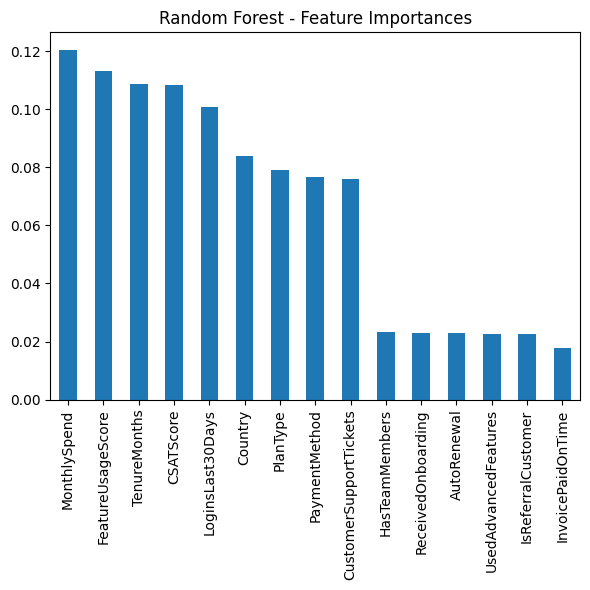

In [ ]:
# Feature importance from Random Forest

import matplotlib.pyplot as plt

rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(6, 6))
rf_importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Random Forest - Feature Importances")
plt.tight_layout()
plt.show()

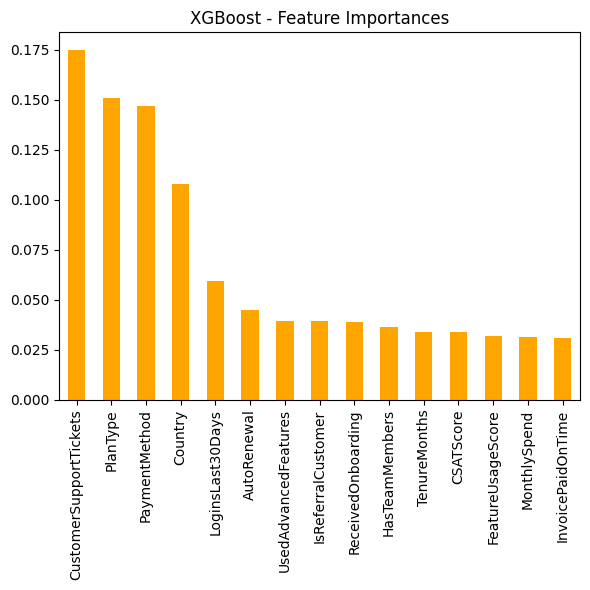

In [ ]:
# Feature importance from XGBoost
xgb_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(6, 6))
xgb_importances.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title("XGBoost - Feature Importances")
plt.tight_layout()
plt.show()